In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_air = pd.read_csv('./data/air.csv', encoding="euc-kr")
df_traffic = pd.read_csv('./data/trafic.CSV', encoding="euc-kr")

In [6]:
df_air.head()

일시   구분  미세먼지(PM10)  초미세먼지(PM2.5)
0  2022-12-31 23:00   평균        59.0          46.0
1  2022-12-31 23:00  강남구        57.0          44.0
2  2022-12-31 23:00  강동구        68.0          55.0
3  2022-12-31 23:00  강북구        59.0          42.0
4  2022-12-31 23:00  강서구        62.0          40.0

In [7]:
df_traffic.head()

일자 자치구명     1시     2시     3시     4시     5시     6시     7시     8시  \
0  2022.05.01  종로구  26.37  27.29  28.26  29.10  29.08  29.44  29.49  28.55   
1  2022.05.01   중구  25.43  26.35  27.38  28.11  28.40  28.33  27.97  27.45   
2  2022.05.01  용산구  30.85  32.27  33.46  34.54  35.10  35.09  34.97  33.54   
3  2022.05.01  성동구  30.65  31.66  32.60  33.43  33.12  32.41  31.80  31.56   
4  2022.05.01  광진구  30.06  31.48  32.38  32.92  33.55  33.24  31.69  30.94   

   ...    15시    16시    17시    18시    19시    20시    21시    22시    23시    24시  
0  ...  20.62  19.84  20.15  18.43  21.98  23.71  24.05  24.86  25.58  26.74  
1  ...  19.16  19.52  19.67  19.52  21.32  23.00  23.34  23.78  24.72  24.83  
2  ...  26.00  25.17  25.45  25.02  26.59  27.86  28.82  29.12  30.61  32.18  
3  ...  24.64  24.70  23.91  24.32  25.74  26.71  26.97  27.45  29.03  29.72  
4  ...  24.45  24.18  24.29  24.24  24.85  25.99  26.46  27.19  28.37  29.51  

[5 rows x 26 columns]

In [8]:
df_air.rename(columns={'구분': '자치구명'}, inplace=True) #trafic.csv에서는 구분이 아니라 자치구명이어서 바꿔줌

df_air['날짜'] = df_air['일시'].str.split().str[0]
df_air['시간'] = df_air['일시'].str.split().str[1].str.split(':').str[0]

df_air.loc[df_air['시간'] == '00', '날짜'] = pd.to_datetime(df_air['날짜']) - pd.Timedelta(days=1) #24시로 바꾸게 되면 1일이 늘어나기 때문에 1일을 빼준다 
df_air['날짜'] = df_air['날짜'].astype(str) #다시 str형식으로 바꿈
df_air.loc[df_air['시간'] == '00', '시간'] = '24' #trafic.csv는 00시가 아니라 24시이기 때문에

In [9]:
df_air.head()

일시 자치구명  미세먼지(PM10)  초미세먼지(PM2.5)          날짜  시간
0  2022-12-31 23:00   평균        59.0          46.0  2022-12-31  23
1  2022-12-31 23:00  강남구        57.0          44.0  2022-12-31  23
2  2022-12-31 23:00  강동구        68.0          55.0  2022-12-31  23
3  2022-12-31 23:00  강북구        59.0          42.0  2022-12-31  23
4  2022-12-31 23:00  강서구        62.0          40.0  2022-12-31  23

In [10]:
df_traffic = df_traffic.melt(id_vars=['자치구명', '일자'], var_name='시간', value_name='교통량') #시간이 header고 교통량이 값들이었던 것들을 분리시킴
df_traffic['시간'] = df_traffic['시간'].str.replace('시', '').astype(int).astype(str) #'시'라는 글자를 없앤후 int형으로 고친 후 다시 str으로 고침
df_traffic['날짜'] = df_traffic['일자'].str.replace('.', '-') #air.csv는 2022-12-31 과 같은 형식이기 때문에 .으로 되어있는 걸 -로 고침
df_traffic['일시'] = df_traffic['날짜'] + ' ' + df_traffic['시간'] 
df_air['일시'] = df_air['날짜'] + ' ' + df_air['시간']

df = pd.merge(df_air, df_traffic, on=['자치구명', '일시'], how='inner') #air랑 traffic을 합치는데 '자치구명'과 '일시'를 기준으로 합친다.

df = df[['자치구명', '일시', '미세먼지(PM10)', '교통량']] #필요 없는 것들은 삭제

In [11]:
df.head()

자치구명             일시  미세먼지(PM10)    교통량
0  강남구  2022-05-31 23        20.0  25.50
1  강동구  2022-05-31 23        25.0  24.13
2  강북구  2022-05-31 23        24.0  21.98
3  강서구  2022-05-31 23        29.0  24.65
4  관악구  2022-05-31 23        29.0  25.78

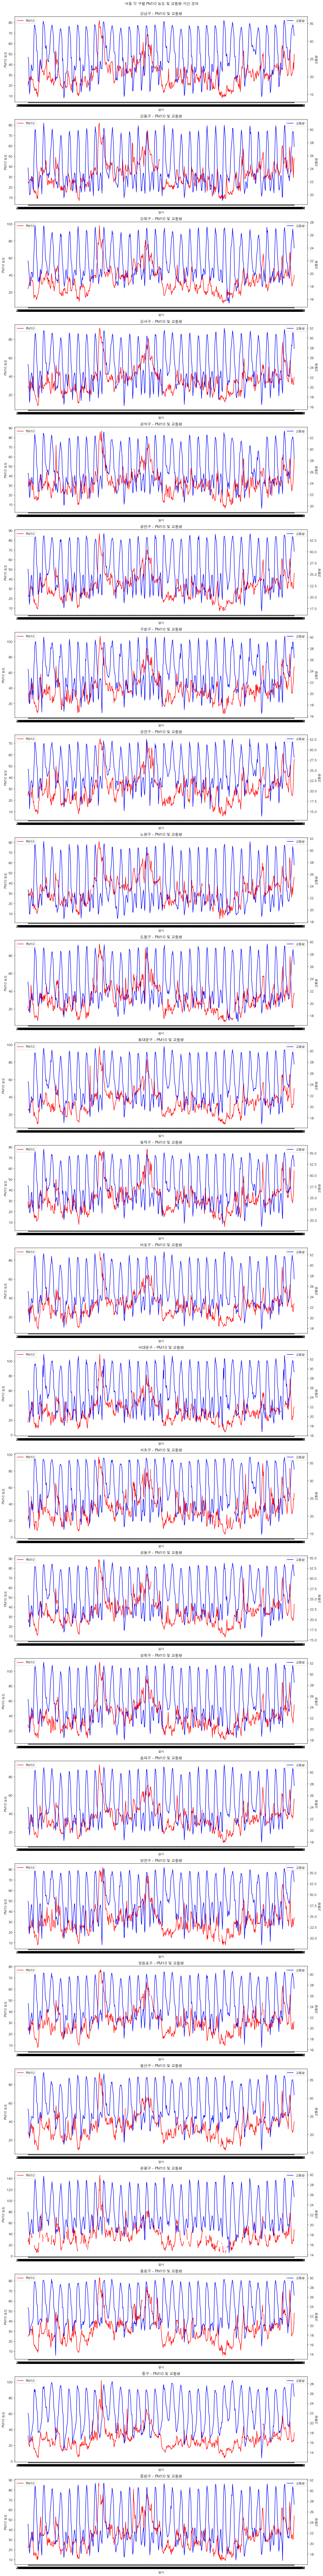

In [12]:
plt.rc('font', family='AppleGothic') #mac에서 한글을 표시하게 설정

districts = df['자치구명'].unique() #자치구명을 중복되는 값을 제외하고 districts로 넣는다.

fig, axs = plt.subplots(len(districts), 1, figsize=(15, 5 * len(districts))) #subplots 생성
fig.suptitle('서울 각 구별 PM10 농도 및 교통량 시간 경과')

for i, district in enumerate(districts):
    district_value = df[df['자치구명'] == district]

    # PM10 플롯
    axs[i].plot(district_value['일시'], district_value['미세먼지(PM10)'], label='PM10', color='red')
    axs[i].set_title(f'{district} - PM10 및 교통량')
    axs[i].set_xlabel('일시')
    axs[i].set_ylabel('PM10 농도')
    
    # 교통량 플롯
    ax2 = axs[i].twinx()
    ax2.plot(district_value['일시'], district_value['교통량'], label='교통량', color='blue')
    ax2.set_ylabel('교통량')
    
    # 범례 설정
    axs[i].legend(loc='upper left')
    ax2.legend(loc='upper right')

# 레이아웃 조정
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()